In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

In [2]:
t = 0;dt = 0.005; s4 = 0;
chi=2; ci=chi; s5=0.7; factive=0.2; s7=0.01; s6=1-factive-s7-s4;
tnow =[]
ixnow = []
#S1=[]

for i in range(1,150000+1):
    t = t + dt
    ni = 0
    if t>30 and t<80:
        ni = 100
        ci = 2
    if t>130 and t<180:
        ni = 75
        ci = 2
    if t>230 and t<280:
        ni = 50
        ci = 2
    if t>330 and t<380:
        ni = 30
        ci = 2
    if t>430 and t<480:
        ni = 15
        ci = 2
    if t>530 and t<580:
        ni = 10
        ci = 2
    if t>630 and t<680:
        ni = 5
        ci = 2
    if t>730 and t<780:
        ni = 0
        ci = 2
    #if t>280 and t<310:
        #ni = 100
        #ci = 0
    #if t>310 and t<340:
        #ni = 0
        #ci = 0
    #if t>340 and t<370:
        #ni = 100
        #ci = 0
    #if t>370 and t<400:
        #ni = 0
        #ci = 0
    #if t>400 and t<430:
        #ni = 100
        #ci = chi
    #if t>430 and t<460:
        #ni = 0
        #ci = 0
        
        
    f3n=ni**2.5/(ni**2.5+17**2.5)
    kcon1=0.1
    kcoff1=0.05
    kcon2=20 
    kcoff2=0.3
    #kinact=0.2 
    #kinact=1
    kinact=0 
    #kinact=1
    #kinact=0.2
    
    s5=s5+ (s6*ci*kcon1-s5*kcoff1+factive*f3n*kinact-s5*0.3) *dt
    factive=factive+(s7*ci*kcon2-factive*kcoff2+s5*0.15-factive*f3n*kinact)*dt
    s7=s7+(factive*kcoff2+s6*0.1-s7*ci*kcon2-s7*f3n*kinact*25)*dt
    s6=1-s5-factive-s7
    
    #S1.append(s1)
    
    incx=factive*f3n
    tnow.append(t)
    ixnow.append(incx)


In [3]:
# Data frame for the data extract
df = pd.DataFrame()
df['time'] = tnow
df['current'] = ixnow

In [4]:
df.shape

(150000, 2)

In [5]:
df.head()

,time,current
0,0.005,0.0
1,0.010,0.0
2,0.015,0.0
3,0.020,0.0
4,0.025,0.0


In [6]:
# For the data reduction 
k=0
T =[]
I =[]
for t,i in zip(df['time'],df['current']):
    if k%100 == 0:
        T.append(t)
        I.append(i)
    k = k+1

In [7]:
len(T)

1500

In [8]:
df = pd.DataFrame()
df['time'] = T
df['current'] = I

In [9]:
df.to_csv("output/current without Na regulation.csv")

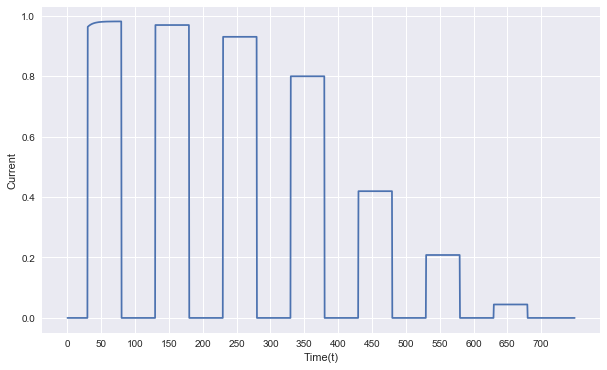

In [19]:
plt.figure(figsize = [10,6])
plt.plot(T,I)
plt.xticks([i*50 for i in range(15)])
plt.xlabel("Time(t)")
plt.ylabel("Current")
plt.savefig("plot/current_Na .png")
plt.savefig("plot/current_Na.pdf")
plt.show()

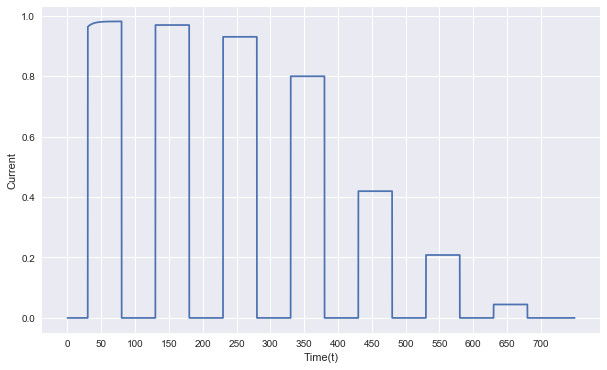

In [20]:
plt.figure(figsize = [10,6])
plt.plot(tnow,ixnow)
plt.xticks([i*50 for i in range(15)])
plt.xlabel("Time(t)")
plt.ylabel("Current")
#plt.savefig("plot/current.png")
#plt.savefig("plot/current.pdf")
plt.show()

In [21]:
A = [i*50 for i in range(15)]

In [22]:
A

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]

### Na-dependent inactivation dictates activation by Ca

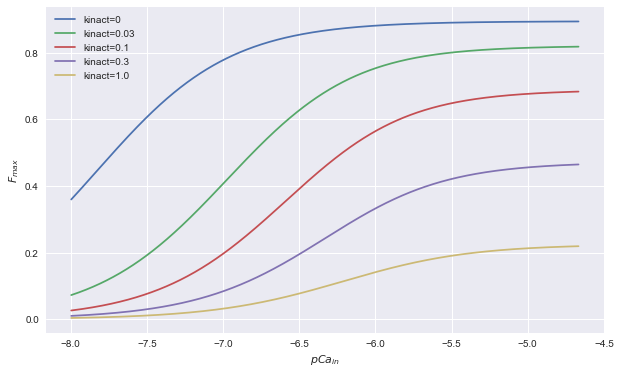

In [23]:
ni = 40
plt.figure(figsize = [10,6])
for kinact in [0, 0.03,0.1,0.3,1.0]:
    cinow = []
    ixnow = []
    for i in range(1,1001):
        
        logci = -(8-(i/300))
        ci = (10**(logci))*1000000
        f3n = (ni**2.5)/((ni**2.5)+(17**2.5))
        kcon1 = 0.1
        kcoff1 = 0.05
        kcon2 = 20
        kcoff2 = 0.3
    
    
        k2 = ci*kcon1
        k1 = kcoff1
        k5 = ci*kcon2
        k6 = kcoff2
        k8 = 0.3
        k7 = f3n*kinact
        k3 = 0.1
        k4 = f3n*kinact*25
    
    
        x1 = k2*k4*(k7+k6)+k5*k7*(k2+k3)
        x2 = k1*k7*(k4+k5)+k4*k6*(k1+k8)
        x3 = k1*k3*(k7+k6)+k8*k6*(k2+k3)
        x4 = k2*k8*(k4+k5)+k3*k5*(k1+k8)
        d = x1+x2+x3+x4
    
        e1 = x1/d
        e2 = x2/d
        e3 = x3/d
        e4 = x4/d
        incx = e4*f3n
        
        cinow.append(logci)
        ixnow.append(incx)
        
    plt.plot(cinow,ixnow,label= "kinact="+str(kinact))
    
plt.xlabel("$pCa_{in}$")
plt.ylabel("$F_{max}$")
plt.legend()
#plt.savefig("plot/inact.png")
#plt.savefig("plot/inact.pdf")
plt.show()